### 1- The problem to solve
Classify different types of cardiac abnormalities using the ECG signal

![](https://drive.google.com/uc?export=view&id=1pzydaNRbcSh1E-S4Ebh0jJEqsim6DeM9)
The ECG signal has patterns that are easily recognizable by professionals, but automated systems that are capable of detecting abnormalities in this signal are often required for constant monitoring of patients.


In [1]:
!pip install fastai wwf tsai -q --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.9/298.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.5 MB/s eta 0:00:00


## 2- Dataset

We will use the dataset [ECG5000](https://timeseriesclassification.com/description.php?Dataset=ECG5000) with 7600 training data and 1900 test data.

Each data contains a cardiac cycle with 140 samples, and that can belong to one of 5 categories:

1. Normal
2. Abnormal: premature ventricular contraction
3. Abnormal: premature supraventricular contraction
4. Abnormal: ectopic beat
5. Abnormal: but unknown pathology

![](https://drive.google.com/uc?export=view&id=1x_sUD1rbM4MM4--s9D4wacRIWEo8aAzL)


### 3- Class imbalance problem

The problem with the ECG5000 set is that it contains 4427 normal data and 3173 abnormal data, that is, it is unbalanced.

In fact, for certain abnormal categories (2 to 5) there are very few data:

| Category    |  Samples|
|-------------|------------|
| 1 (normal)  | 4427       |
| 2 (abnormal) | 2683       |
| 3 (abnormal) | 149        |
| 4 (abnormal) | 306        |
| 5 (abnormal) | 35         |


We can see that the critical case is category 5 with only 35 samples. We need an approach capable of correctly classifying these data. As a first step in our solution approach, we will split our training and validation data sets keeping the proportion of each type of abnormality for each split.




##Exploration and preprocessing of the dataset

In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/ECG5000_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ECG5000_test.csv')

In [ ]:
print(df_train.shape)
print(df_test.shape)

(7600, 141)
(1900, 141)


In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,-1.30300,-0.83573,-1.9336,-2.09420,-2.02840,-1.2531,-0.52638,-0.089286,-0.07557,...,-1.45820,-1.6676,-1.5977,-1.67930,-1.677200,-1.69370,-1.79410,-1.35940,-2.08120,-2.82880
1,2,0.32288,-0.87847,-1.8023,-2.66850,-3.26550,-3.3326,-2.88000,-2.227400,-1.54360,...,-1.23050,-1.7218,-2.1953,-2.74890,-3.446500,-3.66210,-3.01820,-1.65140,-0.23670,0.82832
2,2,1.39340,1.59260,1.2420,0.79449,0.19577,-0.3156,-0.58053,-0.945020,-1.23350,...,-1.90850,-2.5295,-3.0614,-3.50370,-3.900400,-4.24600,-4.13380,-3.19850,-2.42200,-1.07370
3,1,-3.52270,-5.02610,-4.3613,-4.10570,-3.10420,-1.8178,-1.39840,-1.070100,-0.40691,...,0.83038,1.0084,1.1830,0.94636,0.952130,0.79343,0.84741,1.01390,0.31234,-2.19060
4,1,-1.91820,-3.22510,-3.4652,-4.00800,-3.87030,-3.3581,-2.28540,-1.728500,-1.42220,...,1.77690,1.5029,1.1651,0.46073,0.019172,-0.32739,-0.48051,-0.18814,0.14284,-0.66844


In [ ]:
df_train['0'].value_counts()

1    4427
2    2683
4     306
3     149
5      35
Name: 0, dtype: int64

In [ ]:
df_test['0'].value_counts()

1    1119
2     674
4      63
3      33
5      11
Name: 0, dtype: int64

###Split the dataset

In [8]:
from tsai.all import *
from fastai.tabular.all import *

In [ ]:
# Pandas a arreglos numpy
datos_train = df_train.values

# Etiquetas
cat_train = datos_train[:,0]



In [ ]:
print(datos_train.shape)
datos_train

(7600, 141)


array([[ 1.     , -1.303  , -0.83573, ..., -1.3594 , -2.0812 , -2.8288 ],
       [ 2.     ,  0.32288, -0.87847, ..., -1.6514 , -0.2367 ,  0.82832],
       [ 2.     ,  1.3934 ,  1.5926 , ..., -3.1985 , -2.422  , -1.0737 ],
       ...,
       [ 2.     , -0.54602, -1.4301 , ..., -1.7967 , -1.0008 ,  0.28521],
       [ 2.     , -0.81539, -1.2888 , ..., -1.7562 , -1.2625 , -0.61828],
       [ 2.     ,  0.54353, -0.30318, ..., -1.6952 , -1.3174 ,  0.85546]])

In [ ]:
print(cat_train.shape)
cat_train 

(7600,)


array([1., 2., 2., ..., 2., 2., 2.])

In [ ]:
# extracting categories
x_train_1 = datos_train[cat_train==1,1:]
x_train_2 = datos_train[cat_train==2,1:]
x_train_3 = datos_train[cat_train==3,1:]
x_train_4 = datos_train[cat_train==4,1:]
x_train_5 = datos_train[cat_train==5,1:]

In [ ]:
print('x_train_1:', x_train_1.shape)
print('x_train_2:', x_train_2.shape)
print('x_train_3:', x_train_3.shape)
print('x_train_4:', x_train_4.shape)
print('x_train_5:', x_train_5.shape)

x_train_1: (4427, 140)
x_train_2: (2683, 140)
x_train_3: (149, 140)
x_train_4: (306, 140)
x_train_5: (35, 140)


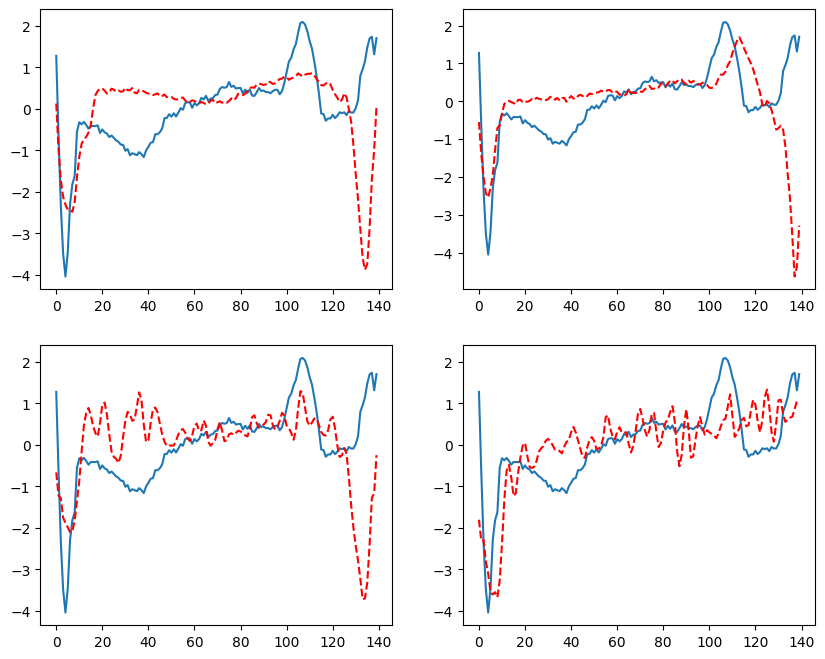

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import numpy as np

ind = 10
normal = x_train_1[ind]
anormal_2 = x_train_2[ind]
anormal_3 = x_train_3[ind]
anormal_4 = x_train_4[ind]
anormal_5 = x_train_5[ind]

plt.figure(figsize=(10,8))
plt.grid()
plt.subplot(2,2,1)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_2, 'r--')
plt.subplot(2,2,2)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_3, 'r--')
plt.subplot(2,2,3)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_4, 'r--')
plt.subplot(2,2,4)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_5, 'r--')

###  Trining our first model 

In [ ]:

indexes_train_2 = np.random.choice(x_train_2.shape[0], round(0.8*len(x_train_2)), replace=False)
X_train_2 = x_train_2[indexes_train_2, :]

indexes_train_3 = np.random.choice(x_train_3.shape[0], round(0.8*len(x_train_3)), replace=False)
X_train_3 = x_train_3[indexes_train_3, :]

indexes_train_4 = np.random.choice(x_train_4.shape[0], round(0.8*len(x_train_4)), replace=False)
X_train_4 = x_train_4[indexes_train_4, :]

indexes_train_5 = np.random.choice(x_train_5.shape[0], round(0.8*len(x_train_5)), replace=False)
X_train_5 = x_train_5[indexes_train_5, :]

num_samples_1 = len(indexes_train_2) + len(indexes_train_3) + len(indexes_train_4) + len(indexes_train_4)
indexes_train_1 = np.random.choice(x_train_1.shape[0],num_samples_1 , replace=False)
X_train_1 = x_train_1[indexes_train_1, :]


# readding labels
cat_train_1 = np.ones((X_train_1.shape[0], 1))

cat_train_2 =  np.zeros((X_train_2.shape[0],1))
cat_train_2[:] = 2 

cat_train_3 =  np.zeros((X_train_3.shape[0],1))
cat_train_3[:] = 3

cat_train_4 =  np.zeros((X_train_4.shape[0],1))
cat_train_4[:] = 4

cat_train_5 =  np.zeros((X_train_5.shape[0],1))
cat_train_5[:] = 5

Y_train = np.concatenate((cat_train_1, cat_train_2, cat_train_3, cat_train_4, cat_train_5))


In [ ]:
Y_train.shape

(5293, 1)

In [ ]:
data_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4, X_train_5))
data_train.shape


(5293, 140)

In [ ]:
indexes_valid_1 = np.setdiff1d(np.arange(x_train_1.shape[0]), indexes_train_1)
X_valid_1 = x_train_1[indexes_valid_1,:]

indexes_valid_2 = np.setdiff1d(np.arange(x_train_2.shape[0]), indexes_train_2)
X_valid_2 = x_train_2[indexes_valid_2,:]

indexes_valid_3 = np.setdiff1d(np.arange(x_train_3.shape[0]), indexes_train_3)
X_valid_3 = x_train_3[indexes_valid_3,:]


indexes_valid_4 = np.setdiff1d(np.arange(x_train_4.shape[0]), indexes_train_4)
X_valid_4 = x_train_4[indexes_valid_4,:]

indexes_valid_5 = np.setdiff1d(np.arange(x_train_5.shape[0]), indexes_train_5)
X_valid_5 = x_train_5[indexes_valid_5,:]


#readding labels
cat_valid_1 = np.ones((X_valid_1.shape[0], 1))

cat_valid_2 =  np.zeros((X_valid_2.shape[0],1))
cat_valid_2[:] = 2

cat_valid_3 =  np.zeros((X_valid_3.shape[0],1))
cat_valid_3[:] = 3

cat_valid_4 =  np.zeros((X_valid_4.shape[0],1))
cat_valid_4[:] = 4

cat_valid_5 =  np.zeros((X_valid_5.shape[0],1))
cat_valid_5[:] = 5

Y_valid = np.concatenate((cat_valid_1,  cat_valid_2, cat_valid_3,cat_valid_4,cat_valid_5))
Y_valid.shape


(2307, 1)

In [ ]:
data_valid = np.concatenate((X_valid_1, X_valid_2, X_valid_3, X_valid_4, X_valid_5))
data_valid.shape

(2307, 140)

In [ ]:
Data_train_1 = np.concatenate((data_train, data_valid))
Target_train_1 = np.concatenate((Y_train, Y_valid))

In [ ]:
Data_train_1.shape

(7600, 140)

In [ ]:
Target_train_1.shape

(7600, 1)

In [ ]:
Target_train_1 = np.squeeze(Target_train_1, axis=1)
Target_train_1.shape

(7600,)

### Preprocessing and normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

Data_train_1_s = min_max_scaler.fit_transform(Data_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(Data_train_1), np.max(Data_train_1)))
print('Mínimo y máximo normalización: {:.1f}, {:.1f}'.format(np.min(Data_train_1_s), np.max(Data_train_1_s)))



Mínimo y máximo originales: -7.1, 7.4
Mínimo y máximo normalización: 0.0, 1.0


In [ ]:
# adding extra dimensions
Data_train_1_s = np.reshape(Data_train_1_s, (Data_train_1_s.shape[0], Data_train_1_s.shape[1],1))


In [ ]:
Data_train_1_s=Data_train_1_s.transpose(0, 2, 1)
Data_train_1_s.shape

(7600, 1, 140)

In [ ]:
Target_train_1 = Target_train_1.astype('int')

Target_train_1 = Target_train_1.astype('str')

In [ ]:
np.save('X.npy', Data_train_1_s)
np.save('y.npy', Target_train_1)

In [ ]:
X = np.load('X.npy', mmap_mode='r')
y = np.load('y.npy', mmap_mode='r')

In [ ]:
print('X shape:', X.shape)
print('y shape:', y.shape)
print('X type:',type(X))
print('y type:',type(y))

X shape: (7600, 1, 140)
y shape: (7600,)
X type: <class 'numpy.memmap'>
y type: <class 'numpy.memmap'>


In [ ]:
# Dataset split function
splits = (L(np.arange(0, len(Y_train)), use_list=True),
          L(np.arange(len(Y_train), len(X)), use_list=True))
splits


((#5293) [0,1,2,3,4,5,6,7,8,9...],
 (#2307) [5293,5294,5295,5296,5297,5298,5299,5300,5301,5302...])

Since we use memmap, the data is read directly from memory. Now, to create and use your own data, it must be in a three-dimensional array formatted as:
* Samples
* Variables
* Length (or timesteps)

To use this we have a special `TSTensor` built to handle such data:

In [ ]:
t = TSTensor(X)
t

TSTensor(samples:7600, vars:1, len:140, device=cpu, dtype=torch.float32)

In [ ]:
# Creating our datablock
splitter = IndexSplitter(splits[1])
getters = [ItemGetter(0), ItemGetter(1)]
dblock = DataBlock(blocks=(TSTensorBlock, CategoryBlock),
                   getters=getters,
                   splitter=splitter)

In [ ]:
src = itemify(X, y)
print(len(src))
print('first element:',src[0])

7600
primer elemento de src: (memmap([[0.64981489, 0.58005411, 0.34314535, 0.25770343, 0.14307363,
         0.21353282, 0.34266039, 0.39814573, 0.44397143, 0.6057324 ,
         0.6296847 , 0.57417919, 0.54671912, 0.50596411, 0.54892236,
         0.55868475, 0.56218049, 0.5523098 , 0.56556701, 0.60878059,
         0.61802869, 0.59975936, 0.55693359, 0.59200229, 0.55607751,
         0.51207579, 0.51805036, 0.50331642, 0.49935644, 0.47314044,
         0.51783729, 0.5082957 , 0.48688508, 0.43257103, 0.34764921,
         0.42723784, 0.49675075, 0.49494565, 0.40856776, 0.50495964,
         0.57704984, 0.58607417, 0.53569035, 0.60285549, 0.59783066,
         0.55200959, 0.53446633, 0.57135096, 0.6080766 , 0.62550825,
         0.59976849, 0.56578451, 0.55739398, 0.54563167, 0.54594831,
         0.55927199, 0.55714931, 0.57486461, 0.66528228, 0.66910872,
         0.64815474, 0.60902483, 0.65495171, 0.70089041, 0.67485342,
         0.64147218, 0.60354426, 0.65457361, 0.72532988, 0.731359  ,
    

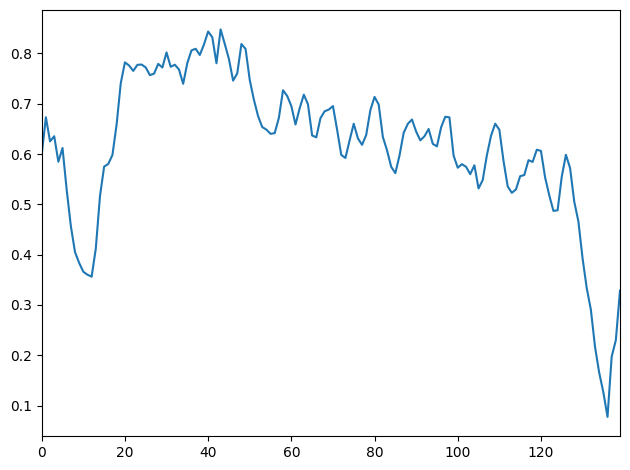

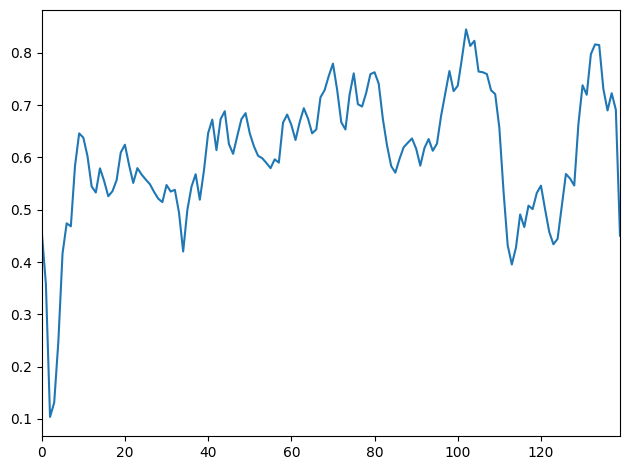

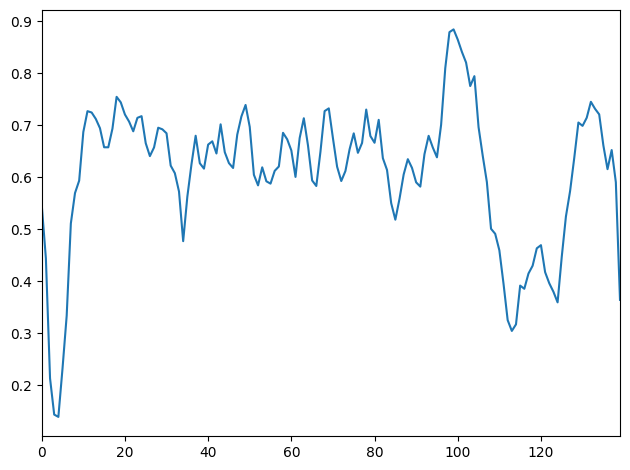

In [ ]:
dls = dblock.dataloaders(src, bs=64, val_bs=128)

dls.show_batch(max_n=3)

In [ ]:
dls.vocab

['1', '2', '3', '4', '5']

##Creating our architecture
The particular architecture we are using is the [Inception Time](https://towardsdatascience.com/deep-learning-for-time-series-classification-inceptiontime-245703f422db). 
To do this we need the number of input classes and our number of variables:

The line of code "net = InceptionTime(inp_vars, dls.c)" instantiates a neural network model called "InceptionTime" and assigns it to the variable "net".

The "InceptionTime" class is an implementation of a convolutional neural network (CNN) architecture for time series, which uses convolutional filters of different sizes and concatenation operations to extract features from the input time series. This class is often used for time series regression or classification problems.

The arguments passed to the "InceptionTime" class are "inp_vars" and "dls.c". "inp_vars" is the number of features or variables in the input data, which is used to define the number of input channels in the initial convolution layer of the neural network. "dls.c" is the number of classes or categories in the classification problem (if any), which is used to define the number of neurons in the output layer of the neural network.

###Instantiating our model 1

In [ ]:
inp_vars = dls.dataset[0][0].shape[-2]
net = InceptionTime(inp_vars, dls.c)

In [ ]:
learn_1 = Learner(dls, net, loss_func=CrossEntropyLossFlat(), metrics=accuracy, opt_func=ranger)

SuggestedLRs(valley=0.002511886414140463)

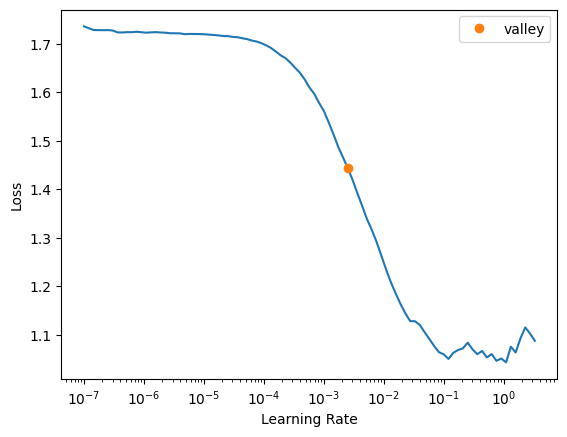

In [ ]:
learn_1.lr_find()

In [ ]:
lr = 3e-03
learn_1.fit_flat_cos(10, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.376024,0.198779,0.947551,00:35
1,0.242453,0.180668,0.958387,00:36
2,0.205156,0.142960,0.961855,00:35
3,0.183285,0.131839,0.961855,00:36
4,0.174371,0.145623,0.960555,00:36
5,0.176890,0.147769,0.962289,00:36
6,0.168633,0.147219,0.960121,00:35
7,0.163699,0.177605,0.956220,00:36
8,0.150326,0.115785,0.966190,00:36
9,0.132683,0.105645,0.971391,00:36


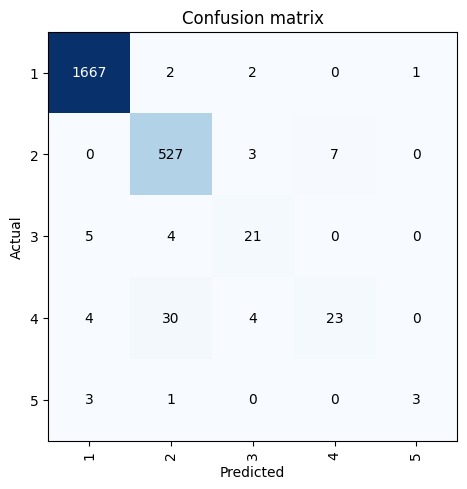

In [ ]:
# getting the confussion matrix
interp = ClassificationInterpretation.from_learner(learn_1)
interp.plot_confusion_matrix()

###Model 2 based on the EasyEnsemble algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

rf stimator

In [ ]:
# Creation of the base classifier
rf = RandomForestClassifier(n_estimators=100, random_state=10)

# Creation of our clasificador EasyEnsemble
eec = EasyEnsembleClassifier(base_estimator=rf, n_estimators=100, random_state=10)

In [ ]:
Data_train_1_s2 = Data_train_1_s[:,0,:]
Data_train_1_s2.shape

(7600, 140)

In [ ]:
# trainning EasyEnsembleClassifier
eec.fit(Data_train_1[0:len(Y_train)-1,:], Target_train_1[0:len(Y_train)-1])

EasyEnsembleClassifier(base_estimator=RandomForestClassifier(random_state=10),
                       n_estimators=100, random_state=10)

In [ ]:
# Predict the values of the cat in the test set
y_pred = eec.predict(Data_train_1[len(Y_train)::, :])

# Model performance evaluation
acc = accuracy_score(Target_train_1[len(Y_train)::], y_pred)
acc

0.8977026441265713

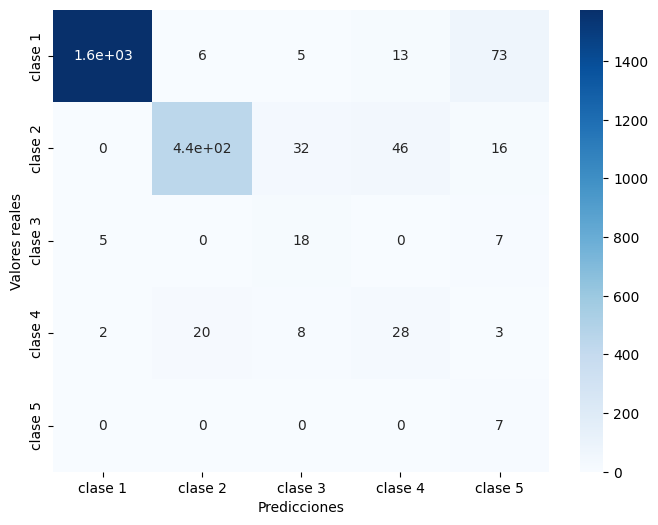

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


class_names = ['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5']


y_target = Target_train_1[len(Y_train)::].astype('int')
y_pred = y_pred.astype('int')


cm = confusion_matrix(y_target, y_pred)



fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=ax)
plt.xlabel('Predictions')
plt.ylabel('Gournd True')
plt.show()

svm stimator

In [ ]:
# Create an SVM estimator
from sklearn.svm import SVC
svm = SVC(kernel='poly', random_state=10)

# Create an EasyEnsemble classifier with the SVM estimator
ee_svm = EasyEnsembleClassifier(base_estimator=svm, n_estimators=100, random_state=10)

In [ ]:
# Training the EasyEnsemble classifier
ee_svm.fit(Data_train_1[0:len(Y_train)-1,:], Target_train_1[0:len(Y_train)-1])

EasyEnsembleClassifier(base_estimator=SVC(kernel='poly', random_state=10),
                       n_estimators=100, random_state=10)

In [ ]:
# Predict the values of the class in the test set
y_pred = ee_svm.predict(Data_train_1[len(Y_train)::, :])

# Model performance evaluation
acc = accuracy_score(Target_train_1[len(Y_train)::], y_pred)
acc

0.9024707412223667

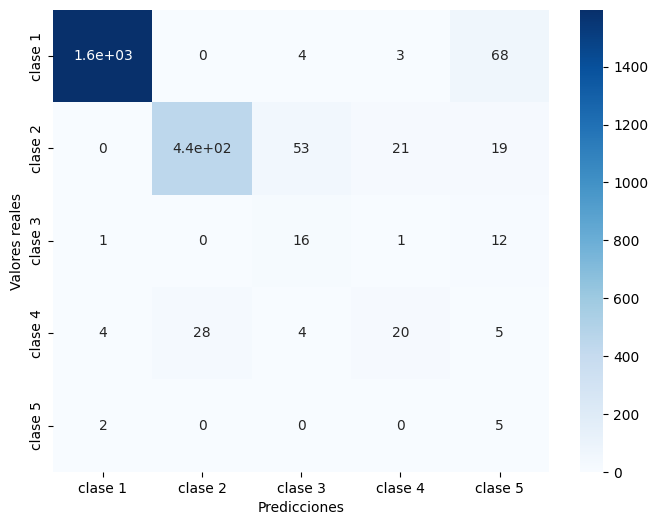

In [ ]:

# Define the class labels
class_names = ['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5']


y_target = Target_train_1[len(Y_train)::].astype('int')
y_pred = y_pred.astype('int')


cm = confusion_matrix(y_target, y_pred)




fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=ax)
plt.xlabel('Predictions')
plt.ylabel('Gournd True')
plt.show()

### model2 bassed in bagging

In [ ]:

ee_svm.fit(Data_train_1[0:len(Y_train)-1,:], Target_train_1[0:len(Y_train)-1])

EasyEnsembleClassifier(base_estimator=SVC(kernel='poly', random_state=10),
                       n_estimators=100, random_state=10)

In [ ]:

y_pred = ee_svm.predict(Data_train_1[len(Y_train)::, :])

acc = accuracy_score(Target_train_1[len(Y_train)::], y_pred)
acc

0.9024707412223667

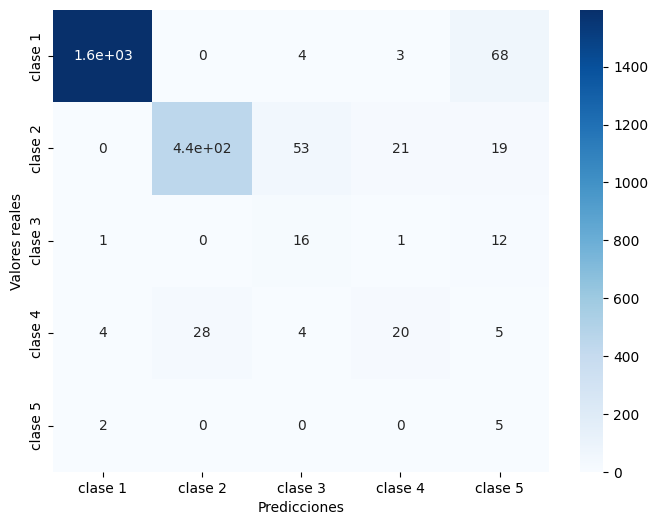

In [ ]:


class_names = ['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5']


y_target = Target_train_1[len(Y_train)::].astype('int')
y_pred = y_pred.astype('int')

cm = confusion_matrix(y_target, y_pred)




fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=ax)
plt.xlabel('Predictions')
plt.ylabel('Gournd True')
plt.show()